In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_sample_weight




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/Credit card fraud/creditcard.csv')
df.head(10)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


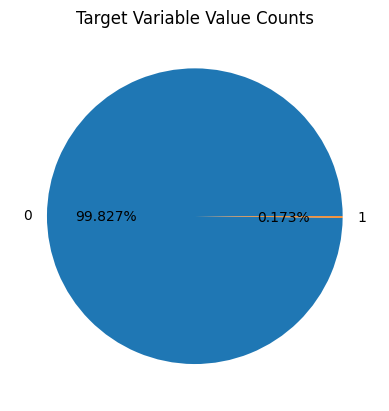

In [4]:
labels = df.Class.unique()

sizes = df.Class.value_counts().values

fig ,ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

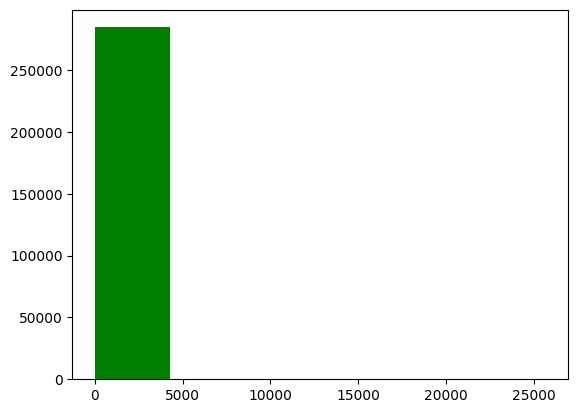

Maximum Values is: 25691.16
Minimum Values is: 0.0


In [5]:
plt.hist(df.Amount.values,6,histtype='bar',facecolor='g')
plt.show()

print("Maximum Values is:",np.max(df.Amount.values))
print("Minimum Values is:",np.min(df.Amount.values))

In [6]:
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
data_matrix = df.values

#x: feature vector
X = data_matrix[:, 1:30]

#y: labels vector
y = data_matrix[:, 30]


X = normalize(X, norm="l1")


print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (284807, 29) y.shape= (284807,)


In [7]:
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

print('X_train.shape=', X_train.shape, 'y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'y_test.shape=', y_test.shape)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('X_train_resampled.shape=', X_train_resampled.shape, 'y_train_resampled.shape=', y_train_resampled.shape)


X_train.shape= (199364, 29) y_train.shape= (199364,)
X_test.shape= (85443, 29) y_test.shape= (85443,)
X_train_resampled.shape= (398040, 29) y_train_resampled.shape= (398040,)


In [13]:
w_train = compute_sample_weight('balanced', y_train_resampled)

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier


model1 = DecisionTreeClassifier(max_depth = 4,random_state=35)
model2 = LinearSVC(random_state=35)
model3 = LogisticRegression(random_state=35)


model1.fit(X_train_resampled, y_train_resampled, sample_weight=w_train)
model2.fit(X_train_resampled, y_train_resampled, sample_weight=w_train)
model3.fit(X_train_resampled, y_train_resampled, sample_weight=w_train)

vc = VotingClassifier(estimators=[('dt', model1), ('svc', model2), ('lr', model3)], voting='hard')
vc.fit(X_train_resampled, y_train_resampled)


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=35)),
                             ('svc', LinearSVC(random_state=35)),
                             ('lr', LogisticRegression(random_state=35))])

In [14]:
from sklearn.metrics import classification_report

vc_pred = vc.predict(X_test)
print(classification_report(y_test, vc_pred))

acc =roc_auc_score(y_test, vc_pred)
print('Accuracy:', acc)


              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     85295
         1.0       0.07      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy: 0.9285730921143315


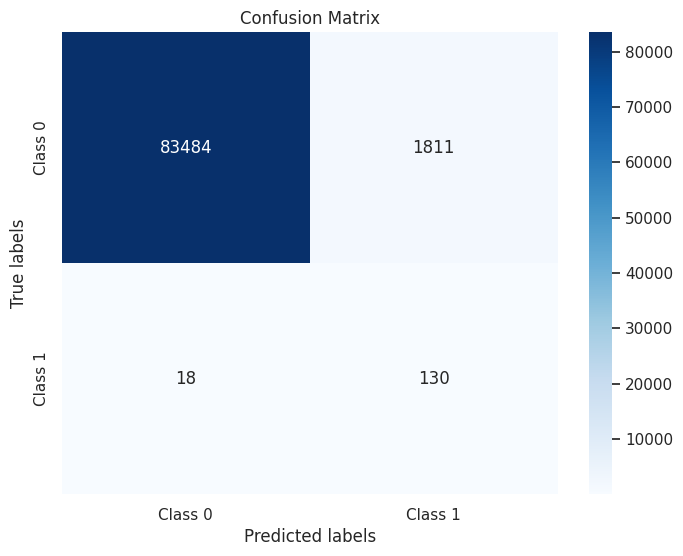

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, vc_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()